In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import time

from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
x_train = np.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/x_train.csv"))
x_test = np.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/x_test.csv"))
y_train = np.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/y_train.csv"))
y_test = np.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/y_test.csv"))

In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
x_train= x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28,28,1))

In [5]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, padding = 'same', activation='relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, padding = 'same', activation='relu'))

model.add(keras.layers.Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(5, activation= 'softmax'))


In [6]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [7]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

start_time = time.time()
default_model = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks=[early_stopping])
print(f"Default Model Training runtime {time.time() - start_time} seconds")

Epoch 1/100
375/375 [==============================] - 56s 144ms/step - loss: 0.8490 - accuracy: 0.6531 - val_loss: 0.6187 - val_accuracy: 0.7496
Epoch 2/100
375/375 [==============================] - 60s 161ms/step - loss: 0.5475 - accuracy: 0.7919 - val_loss: 0.5056 - val_accuracy: 0.8054
Epoch 3/100
375/375 [==============================] - 52s 139ms/step - loss: 0.4646 - accuracy: 0.8232 - val_loss: 0.4518 - val_accuracy: 0.8310
Epoch 4/100
375/375 [==============================] - 55s 145ms/step - loss: 0.4194 - accuracy: 0.8434 - val_loss: 0.3912 - val_accuracy: 0.8576
Epoch 5/100
375/375 [==============================] - 52s 138ms/step - loss: 0.3859 - accuracy: 0.8583 - val_loss: 0.3788 - val_accuracy: 0.8634
Epoch 6/100
375/375 [==============================] - 53s 143ms/step - loss: 0.3629 - accuracy: 0.8674 - val_loss: 0.3539 - val_accuracy: 0.8735
Epoch 7/100
375/375 [==============================] - 52s 139ms/step - loss: 0.3422 - accuracy: 0.8758 - val_loss: 0.3836 -

In [8]:
start_time = time.time()
default_ev = model.evaluate(x_test,y_test)
print(f"Default Model Test runtime {time.time() - start_time} seconds")

313/313 [==============================] - 5s 16ms/step - loss: 0.2208 - accuracy: 0.9227
Default Model Test runtime 20.727071523666382 seconds


In [9]:
print ('Test Loss ', default_ev[0]*100)
print ('Test accuracy', default_ev[1]*100)

Test Loss  22.0840185880661
Test accuracy 92.26999878883362


Text(0.5, 1.0, 'Classification Accuracy vs Training Epoch for Default Model')

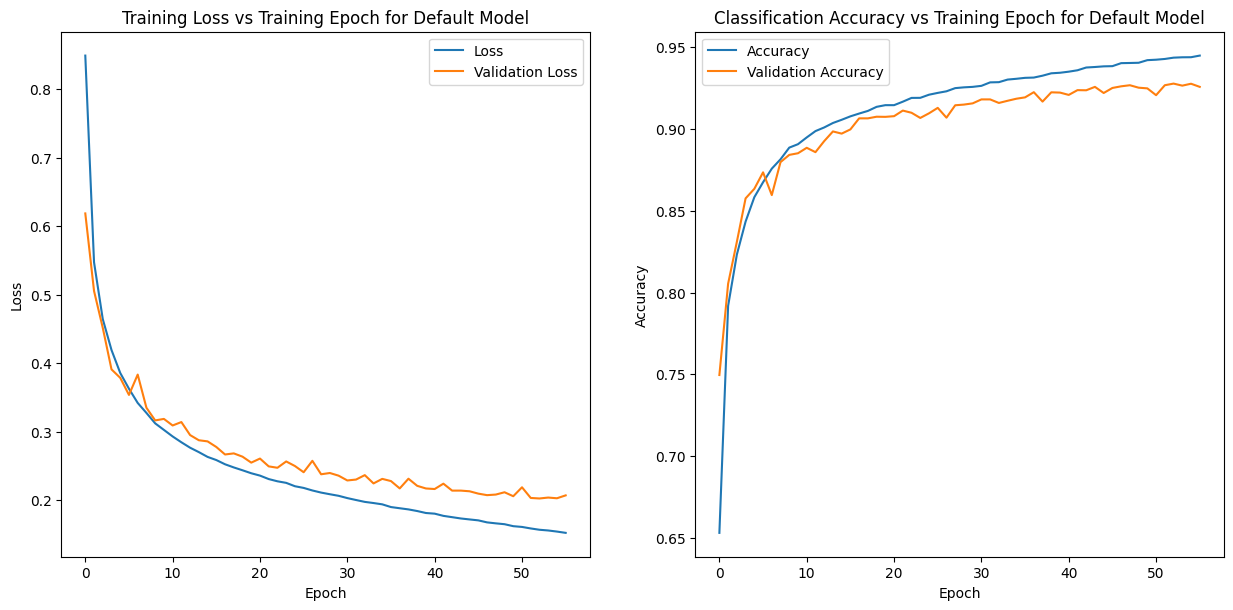

In [10]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(default_model.history['loss'], label='Loss')
plt.plot(default_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Training Epoch for Default Model')

plt.subplot(2, 2, 2)
plt.plot(default_model.history['accuracy'], label='Accuracy')
plt.plot(default_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Classification Accuracy vs Training Epoch for Default Model')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                401472    
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                        

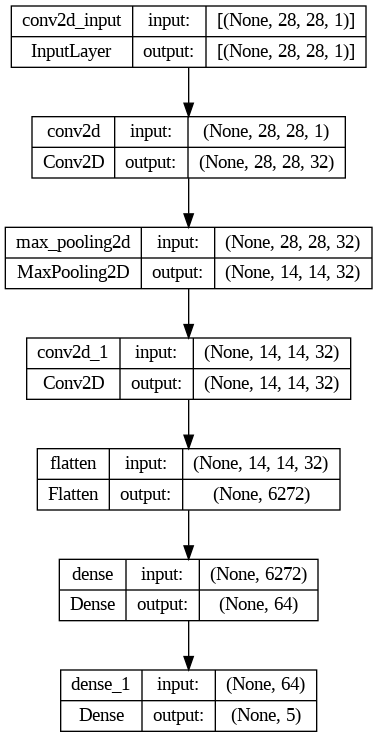

In [12]:
plot_model(model, to_file='default_model_plot.png', show_shapes=True, show_layer_names=True)

Now let's try to change the optimizer to Adam and check the reults of model

In [14]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, padding = 'same' , activation='relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, padding = 'same', activation='relu'))

model.add(keras.layers.Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(5, activation= 'softmax'))

In [15]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model_1 = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/100
375/375 [==============================] - 65s 170ms/step - loss: 0.3733 - accuracy: 0.8618 - val_loss: 0.2757 - val_accuracy: 0.9014
Epoch 2/100
375/375 [==============================] - 60s 160ms/step - loss: 0.2404 - accuracy: 0.9141 - val_loss: 0.2203 - val_accuracy: 0.9222
Epoch 3/100
375/375 [==============================] - 58s 155ms/step - loss: 0.1975 - accuracy: 0.9297 - val_loss: 0.2003 - val_accuracy: 0.9268
Epoch 4/100
375/375 [==============================] - 63s 168ms/step - loss: 0.1693 - accuracy: 0.9395 - val_loss: 0.1865 - val_accuracy: 0.9329
Epoch 5/100
375/375 [==============================] - 66s 177ms/step - loss: 0.1500 - accuracy: 0.9459 - val_loss: 0.1744 - val_accuracy: 0.9373
Epoch 6/100
375/375 [==============================] - 63s 168ms/step - loss: 0.1281 - accuracy: 0.9544 - val_loss: 0.1729 - val_accuracy: 0.9396
Epoch 7/100
375/375 [==============================] - 62s 166ms/step - loss: 0.1140 - accuracy: 0.9595 - val_loss: 0.1756 -

In [16]:
model1_ev = model.evaluate(x_test,y_test)
print ('Test Loss ', model1_ev[0]*100)
print ('Test accuracy', model1_ev[1]*100)

313/313 [==============================] - 5s 14ms/step - loss: 0.1974 - accuracy: 0.9380
Test Loss  19.743861258029938
Test accuracy 93.80000233650208


Text(0.5, 1.0, 'Classification Accuracy vs Training Epoch for Model 1')

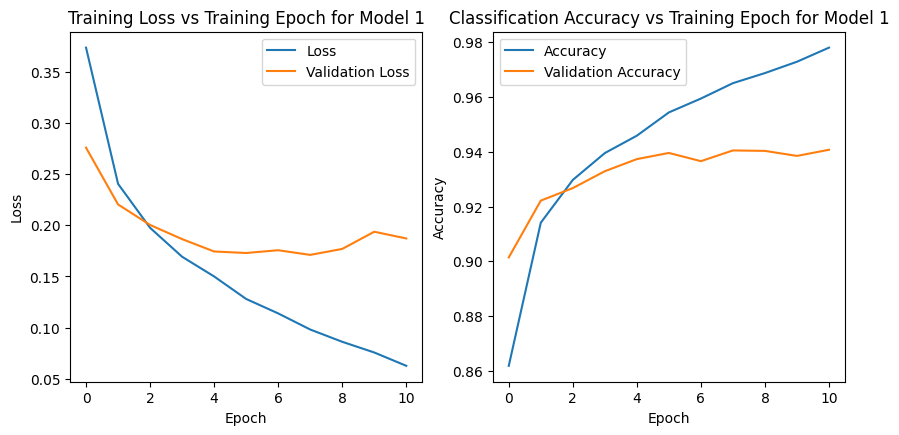

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(model_1.history['loss'], label='Loss')
plt.plot(model_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Training Epoch for Model 1')

plt.subplot(2, 2, 2)
plt.plot(model_1.history['accuracy'], label='Accuracy')
plt.plot(model_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Classification Accuracy vs Training Epoch for Model 1')

The performance of model improves but the model is overfitting as seen from learning loss curve (validation loss > training loss), so to avoid overfitting adding batch normalization and max pooling layer after second convolution layer

In [18]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(Dense(5, activation='softmax'))

In [19]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_2 = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks=[early_stopping])

model2_ev = model.evaluate(x_test,y_test)
print ('Test Loss ', model2_ev[0]*100)
print ('Test accuracy', model2_ev[1]*100)

Epoch 1/100
375/375 [==============================] - 69s 180ms/step - loss: 0.3029 - accuracy: 0.8920 - val_loss: 1.4034 - val_accuracy: 0.5582
Epoch 2/100
375/375 [==============================] - 71s 190ms/step - loss: 0.1914 - accuracy: 0.9306 - val_loss: 0.2014 - val_accuracy: 0.9287
Epoch 3/100
375/375 [==============================] - 75s 199ms/step - loss: 0.1571 - accuracy: 0.9435 - val_loss: 0.1896 - val_accuracy: 0.9338
Epoch 4/100
375/375 [==============================] - 69s 185ms/step - loss: 0.1358 - accuracy: 0.9511 - val_loss: 0.2168 - val_accuracy: 0.9223
Epoch 5/100
375/375 [==============================] - 68s 181ms/step - loss: 0.1197 - accuracy: 0.9566 - val_loss: 0.2645 - val_accuracy: 0.9089
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.2127 - accuracy: 0.9282
Test Loss  21.26574218273163
Test accuracy 92.82000064849854


Text(0.5, 1.0, 'Classification Accuracy vs Training Epoch for Model 2')

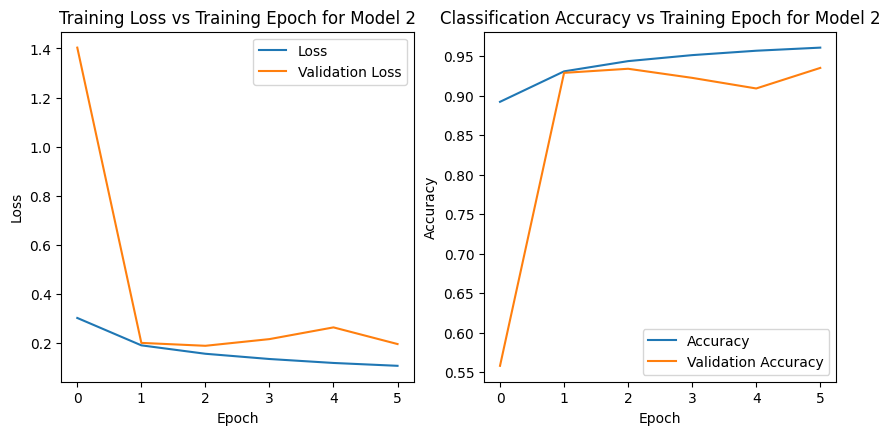

In [20]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(model_2.history['loss'], label='Loss')
plt.plot(model_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Training Epoch for Model 2')

plt.subplot(2, 2, 2)
plt.plot(model_2.history['accuracy'], label='Accuracy')
plt.plot(model_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Classification Accuracy vs Training Epoch for Model 2')

The performace further improves but the model is still overfitting, so adding dropout layers, can probably improve our model’s performance.

In [21]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))

model.add(Dense(5, activation='softmax'))

In [22]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_3 = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks=[early_stopping])

model3_ev = model.evaluate(x_test,y_test)
print ('Test Loss ', model3_ev[0]*100)
print ('Test accuracy', model3_ev[1]*100)

Epoch 1/100
375/375 [==============================] - 79s 204ms/step - loss: 0.4406 - accuracy: 0.8370 - val_loss: 1.0088 - val_accuracy: 0.5468
Epoch 2/100
375/375 [==============================] - 75s 199ms/step - loss: 0.2818 - accuracy: 0.8984 - val_loss: 0.2300 - val_accuracy: 0.9153
Epoch 3/100
375/375 [==============================] - 75s 200ms/step - loss: 0.2439 - accuracy: 0.9124 - val_loss: 0.2028 - val_accuracy: 0.9264
Epoch 4/100
375/375 [==============================] - 76s 203ms/step - loss: 0.2204 - accuracy: 0.9195 - val_loss: 0.1904 - val_accuracy: 0.9314
Epoch 5/100
375/375 [==============================] - 75s 200ms/step - loss: 0.2064 - accuracy: 0.9264 - val_loss: 0.1874 - val_accuracy: 0.9321
Epoch 6/100
375/375 [==============================] - 76s 202ms/step - loss: 0.1935 - accuracy: 0.9300 - val_loss: 0.1771 - val_accuracy: 0.9345
Epoch 7/100
375/375 [==============================] - 75s 199ms/step - loss: 0.1865 - accuracy: 0.9323 - val_loss: 0.1649 -

Text(0.5, 1.0, 'Classification Accuracy vs Training Epoch for Model 3')

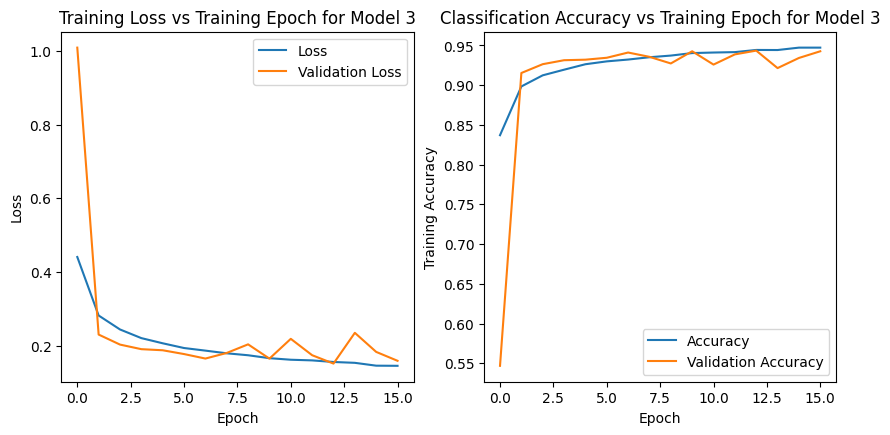

In [23]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(model_3.history['loss'], label='Loss')
plt.plot(model_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Training Epoch for Model 3')

plt.subplot(2, 2, 2)
plt.plot(model_3.history['accuracy'], label='Accuracy')
plt.plot(model_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.title('Classification Accuracy vs Training Epoch for Model 3')

Now, let’s build a new, better model. As previously stated, the solely addition of dropout layers could improve the test accuracy to 93.36%. There is still room to build a more robust CNN. 
After a few tests, I’ve decided to include a third convolutional layers. Let’s check the performance of this new model.

In [24]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(32, (3, 3), strides = 1, activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3, 3), strides = 1, activation='relu', padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.25))

model.add(Dense(5, activation='softmax'))

In [25]:
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

start_time = time.time()
custom_model = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks=[early_stopping])
print(f"Custom Model Training runtime {time.time() - start_time} seconds")

Epoch 1/100
375/375 [==============================] - 90s 233ms/step - loss: 0.4273 - accuracy: 0.8409 - val_loss: 1.1160 - val_accuracy: 0.6291
Epoch 2/100
375/375 [==============================] - 87s 233ms/step - loss: 0.2853 - accuracy: 0.8963 - val_loss: 0.2243 - val_accuracy: 0.9181
Epoch 3/100
375/375 [==============================] - 91s 242ms/step - loss: 0.2454 - accuracy: 0.9119 - val_loss: 0.1999 - val_accuracy: 0.9265
Epoch 4/100
375/375 [==============================] - 92s 246ms/step - loss: 0.2251 - accuracy: 0.9188 - val_loss: 0.1834 - val_accuracy: 0.9322
Epoch 5/100
375/375 [==============================] - 90s 241ms/step - loss: 0.2102 - accuracy: 0.9241 - val_loss: 0.1806 - val_accuracy: 0.9342
Epoch 6/100
375/375 [==============================] - 90s 240ms/step - loss: 0.1974 - accuracy: 0.9292 - val_loss: 0.1703 - val_accuracy: 0.9379
Epoch 7/100
375/375 [==============================] - 88s 235ms/step - loss: 0.1882 - accuracy: 0.9320 - val_loss: 0.1634 -

In [26]:
start_time = time.time()
custom_model_ev = model.evaluate(x_test,y_test)
print(f"Custom Test runtime {time.time() - start_time} seconds")

313/313 [==============================] - 6s 18ms/step - loss: 0.1657 - accuracy: 0.9427
Custom Test runtime 14.002971172332764 seconds


In [27]:
print ('Test Loss ', custom_model_ev[0]*100)
print ('Test accuracy', custom_model_ev[1]*100)

Test Loss  16.574838757514954
Test accuracy 94.27000284194946


The effect of the dropout layers can be observed by looking at the learning curves.
The validation loss decreases for a longer period, reaching lower values than the one found in our default model, and it stabilizes at a certain point. The new model reached a test accuracy of 94.58%, beating the default model.

Text(0.5, 1.0, 'Classification Accuracy vs Training Epoch for Custom Model')

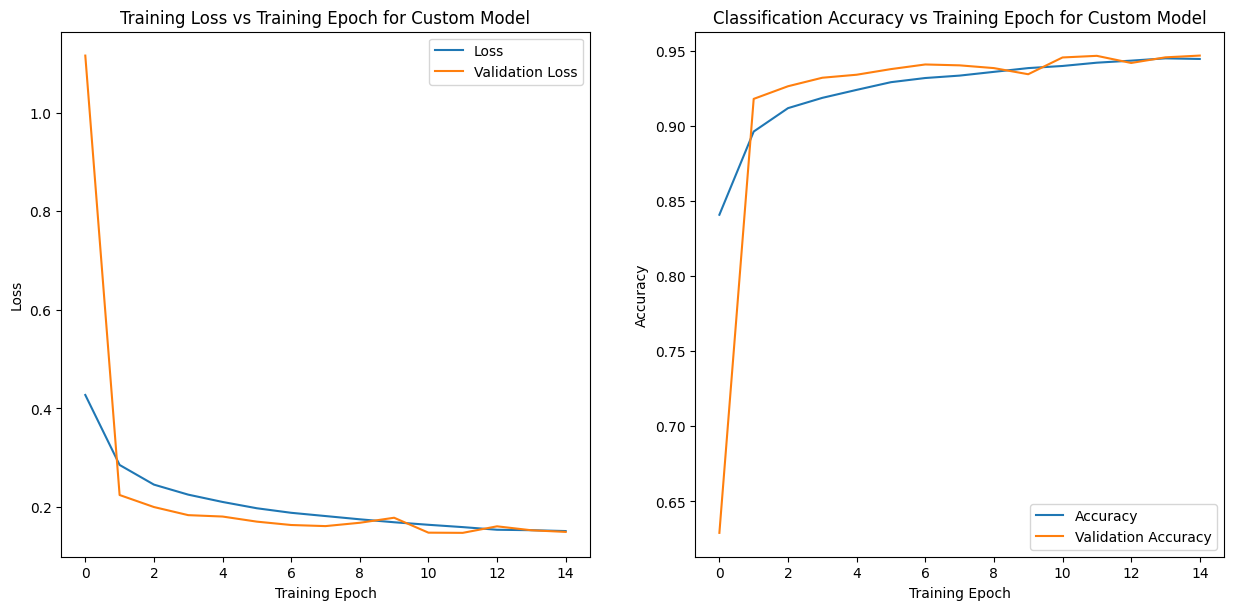

In [28]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(custom_model.history['loss'], label='Loss')
plt.plot(custom_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Training Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Training Epoch for Custom Model')

plt.subplot(2, 2, 2)
plt.plot(custom_model.history['accuracy'], label='Accuracy')
plt.plot(custom_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Training Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Classification Accuracy vs Training Epoch for Custom Model')

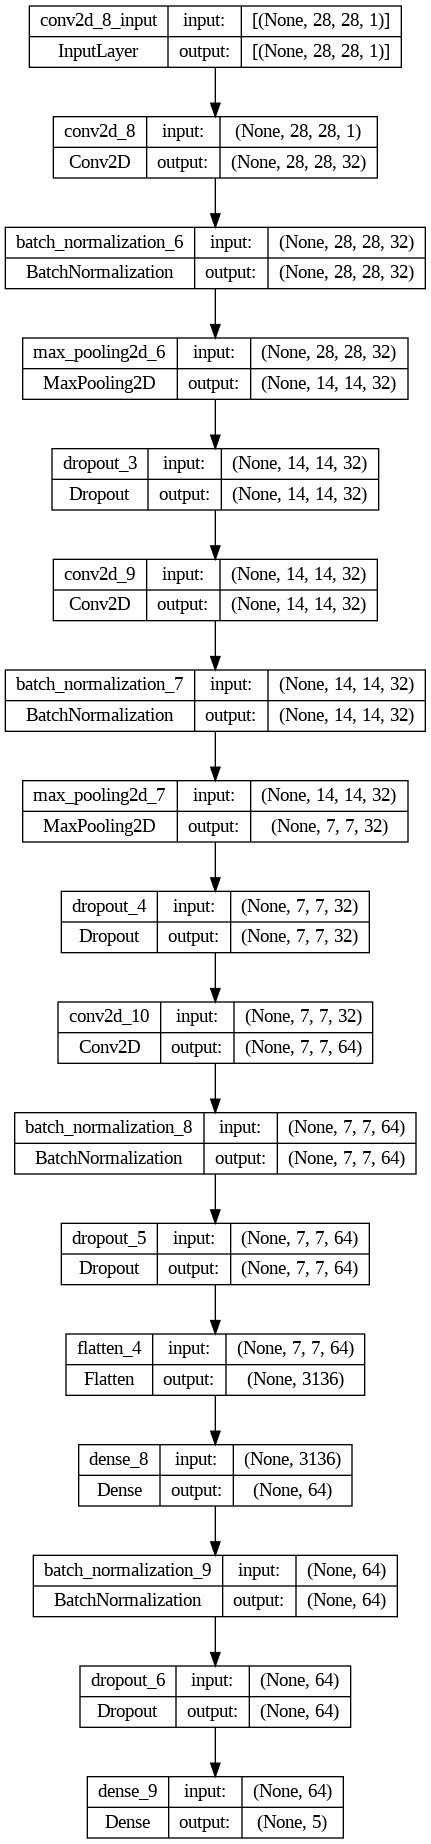

In [29]:
plot_model(model, to_file='custom_model_plot.png', show_shapes=True, show_layer_names=True)

LeNet-5 architecture model on Fashion MNIST dataset with 5 clusters

In [30]:
model = Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
start_time = time.time()
lenet_model = model.fit(x_train, y_train, epochs = 100, batch_size = 128, validation_split = 0.2, callbacks=[early_stopping])
print(f"LeNet-5 Model Training runtime {time.time() - start_time} seconds")

Epoch 1/100
375/375 [==============================] - 55s 145ms/step - loss: 0.4797 - accuracy: 0.8086 - val_loss: 0.3572 - val_accuracy: 0.8601
Epoch 2/100
375/375 [==============================] - 55s 146ms/step - loss: 0.2783 - accuracy: 0.8988 - val_loss: 0.2592 - val_accuracy: 0.9060
Epoch 3/100
375/375 [==============================] - 57s 152ms/step - loss: 0.2300 - accuracy: 0.9161 - val_loss: 0.2284 - val_accuracy: 0.9197
Epoch 4/100
375/375 [==============================] - 56s 149ms/step - loss: 0.2012 - accuracy: 0.9263 - val_loss: 0.2142 - val_accuracy: 0.9223
Epoch 5/100
360/375 [===========================>..] - ETA: 2s - loss: 0.1835 - accuracy: 0.9341

In [ ]:
start_time = time.time()
ev = model.evaluate(x_test,y_test)
print(f"LeNet-5 Model Test runtime {time.time() - start_time} seconds")

In [ ]:
lenet_ev = model.evaluate(x_test,y_test)
print ('Test Loss ', lenet_ev[0]*100)
print ('Test accuracy', lenet_ev[1]*100)

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(lenet_model.history['loss'], label='Loss')
plt.plot(lenet_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Training Epoch for LeNet-5 Model')

plt.subplot(2, 2, 2)
plt.plot(lenet_model.history['accuracy'], label='Accuracy')
plt.plot(lenet_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Classification Accuracy vs Training Epoch for LeNet-5 Model')

In [ ]:
plot_model(model, to_file='lenet_model_plot.png', show_shapes=True, show_layer_names=True)